# Figure 15

Qualitative behavior of the best-fitting models for the multi-player experiment.

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.formula.api import ols

from pathlib import Path

import sys

sys.path.append('../src')

from Config.config import PATHS

import warnings
warnings.filterwarnings("ignore")

In [2]:
from Utils.utils import PPT
from Utils.interaction import Performer
from Utils.indices import AlternationIndex
from Utils.utils import GetMeasurements, Grid
from Classes.cognitive_model_agents import AttendanceM2, FRAplus

In [3]:
file_MPL = PATHS['parameter_fit_results'] / Path('best_fit_MP.json')
df_MP = pd.read_json(file_MPL, lines=True)
df_MP.index = df_MP.model_name
df_parameters_MP = df_MP[['model_name', 'fixed_parameters', 'free_parameters']]
df_MP.drop(columns=['model_name', 'free_parameters', 'fixed_parameters'], inplace=True)

## Show model fitting

In [4]:
df_aic = pd.pivot_table(
    data=df_MP,
    index='model_name',
    values=['AIC'],
    columns='num_agents',
    aggfunc='sum',
)
df_aic['Total'] = df_aic.sum(axis=1)
df_aic.loc[df_aic.index.str.contains('Priors-M3'), 'Total'] = np.inf
df_aic['diff_AIC'] = df_aic['Total'] - df_aic['Total'].min()
df_aic = df_aic.sort_values(by='Total')
df_aic

AIC                                         \
num_agents                       3            4            5            6   
model_name                                                                  
FRA+Payoff+Attendance  3684.904882  6977.142240  4522.751939  2869.173598   
Attendance-M2          3818.142441  7185.037474  4572.366195  2862.665277   
Attendance-M1          4036.153788  7268.471239  4498.977997  2895.914632   
Priors-M1              4326.443783  7505.624306  4544.283015  2896.717922   
Attendance-M3          3694.745791  7204.456863  4692.314781  2963.473000   
MFP-M1                 4323.264303  7412.091917  4784.994111  2918.922977   
FRA                    4099.348714  7412.335301  4793.178143  2967.206719   
Payoff-M1              4386.442763  7578.871255  4768.760581  2936.202320   
AvailableSpace-M1      4341.981438  7559.815326  4827.547317  2941.125087   
Fairness-M1            4400.742825  7560.007823  4775.085229  2942.169728   
MFP-M2                 4215.580996  7324.262274  4877.040104  2957.937050   
AvailableSpace-M2      4247.314555  7382.157225  4848.467097  2951.709034   
Payoff-M2              4314.826283  7599.325491  4858.362839  2969.272438   
Fairness-M2            4320.091431  7613.020273  4861.094374  2976.012114   
WSLS-M1                4462.660241  7646.021885  4869.530434  2974.036892   
Priors-M2              4172.613566  7372.657155  4621.401684  2848.193549   
MFP-M3                 4128.671468  7278.280946  4921.594536  2997.706179   
AvailableSpace-M3      4202.333294  7327.246227  4918.312742  2996.492316   
Payoff-M3              4283.269514  7582.435803  4903.328957  3002.844035   
WSLS-M2                4452.158312  7742.063035  4893.267148  2990.136809   
Fairness-M3            4286.145312  7617.202733  4909.259396  3003.552106   
WSLS-M3                4433.387259  7710.219660  4918.844771  3009.145272   
Priors-M3              4057.234472  7350.202109  4455.720520  4133.134019   

                                                                           \
num_agents                       7            8            9           11   
model_name                                                                  
FRA+Payoff+Attendance  2416.547838  5138.989847  1888.125620  2534.814457   
Attendance-M2          2471.427204  5187.923634  1886.550908  2524.237919   
Attendance-M1          2473.828642  5140.364619  1778.705906  2617.463095   
Priors-M1              2563.447754  5303.245830  1621.057044  2466.013281   
Attendance-M3          2559.664242  5696.089189  2169.152606  2751.798394   
MFP-M1                 2616.008860  5356.104291  2031.094713  2661.069845   
FRA                    2629.465092  5413.198500  2087.419224  2728.211961   
Payoff-M1              2680.672522  5441.449791  1919.634769  2696.228375   
AvailableSpace-M1      2662.438911  5461.400080  2015.317531  2675.519778   
Fairness-M1            2693.063738  5467.451533  1969.157222  2715.604864   
MFP-M2                 2776.328127  5635.115330  2152.103589  2675.558770   
AvailableSpace-M2      2759.492164  5669.844986  2109.049203  2694.149544   
Payoff-M2              2609.531361  5618.621075  2115.660690  2687.878635   
Fairness-M2            2616.731302  5628.217786  2119.727453  2693.629280   
WSLS-M1                2715.798137  5581.603057  2042.571043  2734.505337   
Priors-M2              2752.974949  5504.921353  2372.547434  2805.056143   
MFP-M3                 2785.081312  5860.018310  2233.486715  2756.902908   
AvailableSpace-M3      2778.304523  5858.741872  2225.988976  2762.791549   
Payoff-M3              2612.472706  5827.987620  2250.442172  2751.325662   
WSLS-M2                2628.006101  5736.921052  2189.078799  2714.766294   
Fairness-M3            2619.850809  5854.197179  2257.500116  2757.048396   
WSLS-M3                2628.839834  5875.864944  2254.212282  2757.325662   
Priors-M3                      NaN          NaN          NaN          NaN   

                         

In [5]:
latex_string = df_aic.to_latex()
print(latex_string)

\begin{tabular}{lrrrrrrrrrrr}
\toprule
 & \multicolumn{9}{r}{AIC} & Total & diff_AIC \\
num_agents & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 11 & 12 &  &  \\
model_name &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
FRA+Payoff+Attendance & 3684.904882 & 6977.142240 & 4522.751939 & 2869.173598 & 2416.547838 & 5138.989847 & 1888.125620 & 2534.814457 & 2687.616097 & 32720.066518 & 0.000000 \\
Attendance-M2 & 3818.142441 & 7185.037474 & 4572.366195 & 2862.665277 & 2471.427204 & 5187.923634 & 1886.550908 & 2524.237919 & 2679.123097 & 33187.474150 & 467.407632 \\
Attendance-M1 & 4036.153788 & 7268.471239 & 4498.977997 & 2895.914632 & 2473.828642 & 5140.364619 & 1778.705906 & 2617.463095 & 2575.834505 & 33285.714422 & 565.647904 \\
Priors-M1 & 4326.443783 & 7505.624306 & 4544.283015 & 2896.717922 & 2563.447754 & 5303.245830 & 1621.057044 & 2466.013281 & 2477.507704 & 33704.340639 & 984.274121 \\
Attendance-M3 & 3694.745791 & 7204.456863 & 4692.314781 & 2963.473000 & 2559.664242 & 5696.089189 & 2169.152606 

In [6]:
latex_string_parameters = ''

for model, row in df_parameters_MP.iterrows():
    if model in ['FRA+Payoff+Attendance', 'Priors-M1']:
        print('-'*60)
        print(f'Num_agents: {row['fixed_parameters']['num_agents']} --- Threshold: {row['fixed_parameters']['threshold']}')
        parameters = row['free_parameters']
        print(model)
        print(parameters)

------------------------------------------------------------
Num_agents: 3 --- Threshold: 0.6666666667000001
FRA+Payoff+Attendance
{'inverse_temperature': 6.1099822326, 'bias': 0.8698272916, 'learning_rate': 0.1241596195, 'len_history': 2.7788236228, 'c': 1.0, 'delta': 0.0920092423}
------------------------------------------------------------
Num_agents: 3 --- Threshold: 0.33333333330000003
FRA+Payoff+Attendance
{'inverse_temperature': 5.4541520563, 'bias': 0.8044306115000001, 'learning_rate': 0.0813821683, 'len_history': 3.9030777564, 'c': 1.0, 'delta': 0.13090462490000002}
------------------------------------------------------------
Num_agents: 4 --- Threshold: 0.5
FRA+Payoff+Attendance
{'inverse_temperature': 2.314927443, 'bias': 1.0, 'learning_rate': 0.5070447718000001, 'len_history': 1.8915745755, 'c': 0.7957406254, 'delta': 0.17900255110000002}
------------------------------------------------------------
Num_agents: 4 --- Threshold: 0.75
FRA+Payoff+Attendance
{'inverse_temperatur

In [7]:
df_FRAPlus = df_parameters_MP[df_parameters_MP['model_name'] == 'FRA+Payoff+Attendance']
df_FRAPlus['c'] = df_FRAPlus['free_parameters'].apply(lambda x: x['c'])
df_FRAPlus['delta'] = df_FRAPlus['free_parameters'].apply(lambda x: x['delta'])
df_FRAPlus['len_history'] = df_FRAPlus['free_parameters'].apply(lambda x: x['len_history'])
df_FRAPlus['num_agents'] = df_FRAPlus['fixed_parameters'].apply(lambda x: x['num_agents'])
df_FRAPlus['threshold'] = df_FRAPlus['fixed_parameters'].apply(lambda x: x['threshold'])

## Simulate two best fit models

Get human data

In [8]:
data_folder = PATHS['human_data']
file_name = 'multi-player.csv'
file = data_folder / Path(file_name)
data_human = pd.read_csv(file)
data_human['model'] = 'human'

list_fixed_parameters = PPT.get_fixed_parameters(data_human)
dict_sizes = PPT.get_number_of_groups(data_human)

Simulate model

In [ ]:
def get_free_parameters(model_name, fixed_parameters):
    mask1 = df_parameters_MP['model_name'] == model_name 
    mask2 = df_parameters_MP['fixed_parameters'].apply(
        lambda params: np.all([
            np.isclose(value, fixed_parameters[x]) for x, value in params.items()
        ])
    )
    mask = mask1 & mask2
    if not mask.any():
        raise ValueError(f"Model {model_name} with fixed parameters {fixed_parameters} not found.")
    df = df_parameters_MP[mask]
    return df['free_parameters'].values[0]

def get_num_episodes(fixed_parameters):
    print(f'{fixed_parameters=}')
    num_players = fixed_parameters['num_agents']
    threshold = fixed_parameters['threshold']
    return dict_sizes[(num_players, threshold)]

# BEST_MODEL = AttendanceM2
BEST_MODEL = FRAplus

data_folder = PATHS['simulated_data']

for i, fixed_parameters in enumerate(list_fixed_parameters):
    free_parameters = get_free_parameters(BEST_MODEL.name(), fixed_parameters)
    num_agents = fixed_parameters['num_agents']
    threshold = fixed_parameters['threshold']
    num_episodes = dict_sizes[(num_agents, threshold)]
    simulation_parameters = {
        'num_episodes':num_episodes,
        'num_rounds':30,
        'verbose':False
    }
    random.seed(1)
    seeds = [random.randint(0, 1000) for _ in range(num_episodes)]
    Performer.simple_run(
        agent_class=BEST_MODEL,
        fixed_parameters=fixed_parameters,
        free_parameters=free_parameters,
        simulation_parameters=simulation_parameters,
        measures=[],
        data_folder=data_folder,
        new_file=True,
        seeds=seeds
    )

## Compare to human data

In [53]:
#Load data from FRAplus
simulation_numbers = list(range(1, 27))
df_list = []
for n in simulation_numbers:
    file_name = PATHS['simulated_data'] / Path(f'{FRAplus.name()}_{n}.csv')
    if file_name.exists():
        df = pd.read_csv(file_name)
        df['model'] = FRAplus.name()
        df_list.append(df)

data_sim1 = pd.concat(df_list, ignore_index=True)

#Load data from Attendance-M2
df_list = []
for n in simulation_numbers:
    file_name = PATHS['simulated_data'] / Path(f'{AttendanceM2.name()}_{n}.csv')
    if file_name.exists():
        df = pd.read_csv(file_name)
        df['model'] = AttendanceM2.name()
        df_list.append(df)

data_sim2 = pd.concat(df_list, ignore_index=True)

# Calculate alternation index per group for FRAplus
raw_df1 = PPT.concat_dfs(data_human, data_sim1)
raw_df1['session_round'] = raw_df1['round'].apply(lambda x: x % 30)
gm = GetMeasurements(
    data=raw_df1,
    measures=['efficiency', 'bounded_efficiency', 'inequality'],
    T=np.inf
)
df1 = gm.get_measurements()
alt_index = AlternationIndex.from_file(priority='sklearn')
df1['alternation_index'] = alt_index(df1)
df_jitter1 = df1.copy()
df_jitter1['efficiency'] = df_jitter1['efficiency'] + np.random.normal(0, 0.01, len(df_jitter1['efficiency']))
df_jitter1['inequality'] = df_jitter1['inequality'] + np.random.normal(0, 0.01, len(df_jitter1['inequality']))

# Calculate alternation index per group for Attendance
raw_df2 = PPT.concat_dfs(data_human, data_sim2)
raw_df2['session_round'] = raw_df2['round'].apply(lambda x: x % 30)
gm = GetMeasurements(
    data=raw_df2,
    measures=['efficiency', 'bounded_efficiency', 'inequality'],
    T=np.inf
)
df2 = gm.get_measurements()
alt_index = AlternationIndex.from_file(priority='sklearn')
df2['alternation_index'] = alt_index(df2)
df_jitter2 = df2.copy()
df_jitter2['efficiency'] = df_jitter2['efficiency'] + np.random.normal(0, 0.01, len(df_jitter2['efficiency']))
df_jitter2['inequality'] = df_jitter2['inequality'] + np.random.normal(0, 0.01, len(df_jitter2['inequality']))

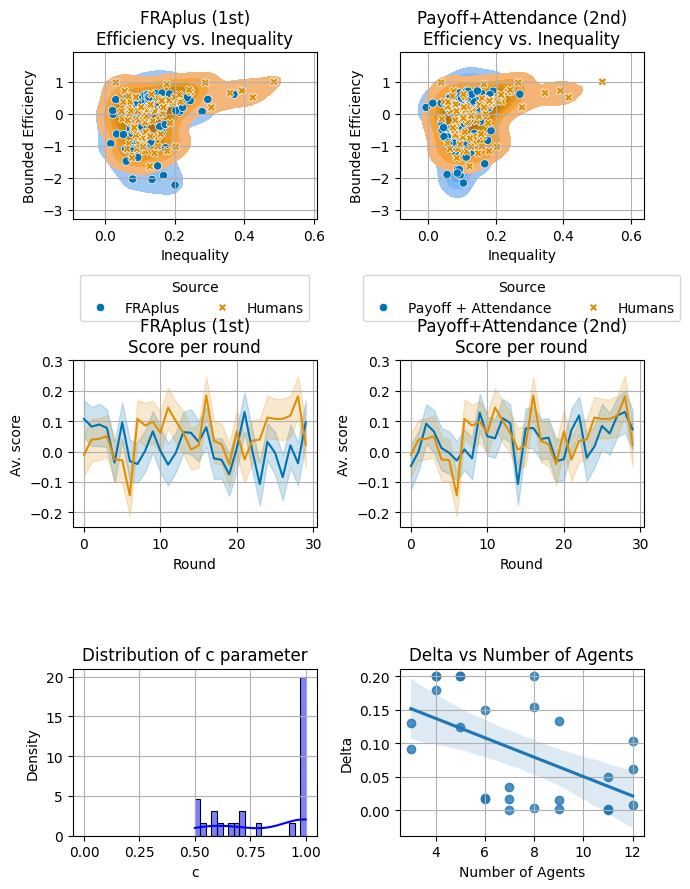

In [94]:
grid = Grid(6, vertical=True)
fig, axes = plt.subplots(
    grid.rows, grid.cols,
    figsize=(grid.cols * 3.5, grid.rows * 3),
    tight_layout=True,
    sharex=False, sharey=False    
)

sns.kdeplot(
    x='inequality', y='bounded_efficiency',
    hue='model',style='model',
    data=df_jitter1, palette='colorblind', fill=True,
    ax=axes[0, 0]
)
sns.scatterplot(
    x='inequality', y='bounded_efficiency',
    hue='model',style='model',
    data=df_jitter1, palette='colorblind',
    ax=axes[0, 0]
)
axes[0, 0].set_xlabel('Inequality')
axes[0, 0].set_ylabel('Bounded Efficiency')
axes[0, 0].set_title('FRAplus (1st)\nEfficiency vs. Inequality')
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend(
    title='Source',
    handles=handles,
    labels=['FRAplus', 'Humans'],
    loc='lower center',      # you can also use 'upper center'
    bbox_to_anchor=(0.5, -0.65),  # y < 0 moves it below the axes
    ncol=2,        # or choose a smaller number for multi‑row
)
axes[0, 0].grid()

sns.kdeplot(
    x='inequality', y='bounded_efficiency',
    hue='model',style='model',
    data=df_jitter2, palette='colorblind', fill=True,
    ax=axes[0, 1]
)
sns.scatterplot(
    x='inequality', y='bounded_efficiency',
    hue='model',style='model',
    data=df_jitter2, palette='colorblind',
    ax=axes[0, 1]
)
axes[0, 1].set_xlabel('Inequality')
axes[0, 1].set_ylabel('Bounded Efficiency')
axes[0, 1].set_title('Payoff+Attendance (2nd)\nEfficiency vs. Inequality')
handles, labels = axes[0, 1].get_legend_handles_labels()
axes[0, 1].legend(
    title='Source',
    handles=handles,
    labels=['Payoff + Attendance', 'Humans'],
    loc='lower center',      # you can also use 'upper center'
    bbox_to_anchor=(0.5, -0.65),  # y < 0 moves it below the axes
    ncol=2,        # or choose a smaller number for multi‑row
)
axes[0, 1].grid()


sns.lineplot(
    x='session_round', y='score', 
    hue='model', hue_order=[FRAplus.name(), 'human'],
    data=raw_df1, palette='colorblind',
    ax=axes[1,0]
)
axes[1, 0].set_xlabel('Round')
axes[1, 0].set_ylabel('Av. score')
axes[1, 0].set_ylim([-0.25, 0.3])
axes[1, 0].set_title('FRAplus (1st)\nScore per round')
axes[1,0].legend().remove()
axes[1, 0].grid()

sns.lineplot(
    x='session_round', y='score', 
    hue='model', hue_order=[AttendanceM2.name(), 'human'],
    data=raw_df2, palette='colorblind',
    ax=axes[1,1]
)
axes[1, 1].set_xlabel('Round')
axes[1, 1].set_ylabel('Av. score')
axes[1, 1].set_ylim([-0.25, 0.3])
axes[1, 1].set_title('Payoff+Attendance (2nd)\nScore per round')
axes[1, 1].legend().remove()
axes[1, 1].grid()

sns.histplot(
    data=df_FRAPlus,
    x='c',
    bins=20,
    kde=True,
    stat='density',
    color='blue',
    edgecolor='black',
    ax=axes[2, 0],
)
axes[2, 0].set_title('Distribution of c parameter')
axes[2, 0].set_xlabel('c')
axes[2, 0].set_xlim([-0.05, 1.05])
axes[2, 0].set_ylabel('Density')
axes[2, 0].grid()

sns.regplot(
    data=df_FRAPlus,
    x='num_agents',
    y='delta',
    ax=axes[2, 1],
)
axes[2, 1].set_title('Delta vs Number of Agents')
axes[2, 1].set_xlabel('Number of Agents')
axes[2, 1].set_ylabel('Delta')
axes[2, 1].grid()

In [95]:
fig.savefig(PATHS['figures_for_paper'] / 'Figure15.png', dpi=300, bbox_inches='tight')

---

### Correlations

In [93]:
r_scipy, p_value = pearsonr(df_FRAPlus['c'], df_FRAPlus['num_agents'])
print('Correlation between c and num_agents:')
print(f"Pearson r: {r_scipy:.4f}, p‑value: {p_value:.4g}")

print('')
print('Correlation between c and threshold:')
r_scipy, p_value = pearsonr(df_FRAPlus['c'], df_FRAPlus['threshold'])
print(f"Pearson r: {r_scipy:.4f}, p‑value: {p_value:.4g}")

print('')
r_scipy, p_value = pearsonr(df_FRAPlus['delta'], df_FRAPlus['num_agents'])
print('Correlation between delta and num_agents:')
print(f"Pearson r: {r_scipy:.4f}, p‑value: {p_value:.4g}")

print('')
print('Correlation between delta and threshold:')
r_scipy, p_value = pearsonr(df_FRAPlus['delta'], df_FRAPlus['threshold'])
print(f"Pearson r: {r_scipy:.4f}, p‑value: {p_value:.4g}")

print('')
r_scipy, p_value = pearsonr(df_FRAPlus['len_history'], df_FRAPlus['num_agents'])
print('Correlation between len_history and num_agents:')
print(f"Pearson r: {r_scipy:.4f}, p‑value: {p_value:.4g}")

print('')
print('Correlation between len_history and threshold:')
r_scipy, p_value = pearsonr(df_FRAPlus['len_history'], df_FRAPlus['threshold'])
print(f"Pearson r: {r_scipy:.4f}, p‑value: {p_value:.4g}")

Correlation between c and num_agents:
Pearson r: -0.1956, p‑value: 0.3383

Correlation between c and threshold:
Pearson r: 0.0718, p‑value: 0.7274

Correlation between delta and num_agents:
Pearson r: -0.5324, p‑value: 0.005116

Correlation between delta and threshold:
Pearson r: 0.0879, p‑value: 0.6694

Correlation between len_history and num_agents:
Pearson r: 0.4302, p‑value: 0.02826

Correlation between len_history and threshold:
Pearson r: 0.0660, p‑value: 0.7487


### Linear regressions

In [90]:
formula = 'c ~ num_agents + threshold + num_agents * threshold'
lm = ols(formula, df_FRAPlus).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                    0.3715
Date:                Thu, 24 Jul 2025   Prob (F-statistic):              0.774
Time:                        17:30:30   Log-Likelihood:                 5.6447
No. Observations:                  26   AIC:                            -3.289
Df Residuals:                      22   BIC:                             1.743
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0032 

In [91]:
formula = 'delta ~ num_agents + threshold + num_agents * threshold'
lm = ols(formula, df_FRAPlus).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  delta   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     3.389
Date:                Thu, 24 Jul 2025   Prob (F-statistic):             0.0361
Time:                        17:30:35   Log-Likelihood:                 34.750
No. Observations:                  26   AIC:                            -61.50
Df Residuals:                      22   BIC:                            -56.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2784 

In [92]:
formula = 'len_history ~ num_agents + threshold + num_agents * threshold'
lm = ols(formula, df_FRAPlus).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            len_history   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     2.908
Date:                Thu, 24 Jul 2025   Prob (F-statistic):             0.0574
Time:                        17:30:41   Log-Likelihood:                -59.382
No. Observations:                  26   AIC:                             126.8
Df Residuals:                      22   BIC:                             131.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.9953 